# 1. Importando as bibliotecas

In [70]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam

# 2. Importando os csv's

In [2]:
dataset = pd.read_csv('train.csv')
holidays_dataset = pd.read_csv('holidays_events.csv')
oil_dataset = pd.read_csv('oil.csv')
stores_dataset = pd.read_csv('stores.csv')
transactions_dataset = pd.read_csv('transactions.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
test_dataset

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


Adicionando a coluna 'sales' ao dataset de teste

In [4]:
test_dataset['sales'] = float('nan')
test_dataset

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN
1,3000889,2017-08-16,1,BABY CARE,0,NaN
2,3000890,2017-08-16,1,BEAUTY,2,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,NaN
4,3000892,2017-08-16,1,BOOKS,0,NaN
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,NaN


Demarcando o que é de teste e o que é treino

In [5]:
dataset['is_test'] = 0
test_dataset['is_test'] = 1

all_features = pd.concat((dataset, test_dataset))
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,0
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1


In [6]:
all_features['date'] = pd.to_datetime(all_features['date'])

# Ordenar o dataset por id
all_features = all_features.sort_values('id')
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,0
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1


In [7]:
unique_families = all_features['family'].unique()
unique_families

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [8]:
familytoidx = {family: idx for idx, family in enumerate(unique_families)}
familytoidx

{'AUTOMOTIVE': 0,
 'BABY CARE': 1,
 'BEAUTY': 2,
 'BEVERAGES': 3,
 'BOOKS': 4,
 'BREAD/BAKERY': 5,
 'CELEBRATION': 6,
 'CLEANING': 7,
 'DAIRY': 8,
 'DELI': 9,
 'EGGS': 10,
 'FROZEN FOODS': 11,
 'GROCERY I': 12,
 'GROCERY II': 13,
 'HARDWARE': 14,
 'HOME AND KITCHEN I': 15,
 'HOME AND KITCHEN II': 16,
 'HOME APPLIANCES': 17,
 'HOME CARE': 18,
 'LADIESWEAR': 19,
 'LAWN AND GARDEN': 20,
 'LINGERIE': 21,
 'LIQUOR,WINE,BEER': 22,
 'MAGAZINES': 23,
 'MEATS': 24,
 'PERSONAL CARE': 25,
 'PET SUPPLIES': 26,
 'PLAYERS AND ELECTRONICS': 27,
 'POULTRY': 28,
 'PREPARED FOODS': 29,
 'PRODUCE': 30,
 'SCHOOL AND OFFICE SUPPLIES': 31,
 'SEAFOOD': 32}

In [9]:
max_sales = all_features['sales'].max()
max_sales

124717.0

In [10]:
all_features['family'] = [familytoidx[n] for n in all_features['family']]
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test
0,0,2013-01-01,1,0,0.0,0,0
1,1,2013-01-01,1,1,0.0,0,0
2,2,2013-01-01,1,2,0.0,0,0
3,3,2013-01-01,1,3,0.0,0,0
4,4,2013-01-01,1,4,0.0,0,0
...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,NaN,1,1
28508,3029396,2017-08-31,9,29,NaN,0,1
28509,3029397,2017-08-31,9,30,NaN,1,1
28510,3029398,2017-08-31,9,31,NaN,9,1


# 3. Juntando as informações das lojas

In [11]:
all_features = all_features.merge(stores_dataset[['store_nbr', 'city', 'state', 'type', 'cluster']], on='store_nbr', how='left')
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,city,state,type,cluster
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6


In [12]:
# Rename to store_
all_features = all_features.rename(columns={'city': 'store_city', 'state': 'store_state', 'type': 'store_type', 'cluster':'store_cluster'})
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,store_cluster
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6


In [13]:
unique_stores = all_features['store_nbr'].unique()
unique_stores

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [14]:
unique_store_cities = stores_dataset['city'].unique()
unique_store_cities

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [15]:
unique_store_types = stores_dataset['type'].unique()
unique_store_types

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [16]:
unique_store_clusters = stores_dataset['cluster'].unique()
unique_store_clusters

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17],
      dtype=int64)

In [17]:
storetoidx = {store: idx for idx, store in enumerate(unique_stores)}
storetoidx

{1: 0,
 10: 1,
 11: 2,
 12: 3,
 13: 4,
 14: 5,
 15: 6,
 16: 7,
 17: 8,
 18: 9,
 19: 10,
 2: 11,
 20: 12,
 21: 13,
 22: 14,
 23: 15,
 24: 16,
 25: 17,
 26: 18,
 27: 19,
 28: 20,
 29: 21,
 3: 22,
 30: 23,
 31: 24,
 32: 25,
 33: 26,
 34: 27,
 35: 28,
 36: 29,
 37: 30,
 38: 31,
 39: 32,
 4: 33,
 40: 34,
 41: 35,
 42: 36,
 43: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 48: 42,
 49: 43,
 5: 44,
 50: 45,
 51: 46,
 52: 47,
 53: 48,
 54: 49,
 6: 50,
 7: 51,
 8: 52,
 9: 53}

In [18]:
storecitytoidx = {store_city: idx for idx, store_city in enumerate(unique_store_cities)}
storecitytoidx

{'Quito': 0,
 'Santo Domingo': 1,
 'Cayambe': 2,
 'Latacunga': 3,
 'Riobamba': 4,
 'Ibarra': 5,
 'Guaranda': 6,
 'Puyo': 7,
 'Ambato': 8,
 'Guayaquil': 9,
 'Salinas': 10,
 'Daule': 11,
 'Babahoyo': 12,
 'Quevedo': 13,
 'Playas': 14,
 'Libertad': 15,
 'Cuenca': 16,
 'Loja': 17,
 'Machala': 18,
 'Esmeraldas': 19,
 'Manta': 20,
 'El Carmen': 21}

In [19]:
storetypetoidx = {store_type: idx for idx, store_type in enumerate(unique_store_types)}
storetypetoidx

{'D': 0, 'B': 1, 'C': 2, 'E': 3, 'A': 4}

In [20]:
storeclustertoidx = {store_cluster: idx for idx, store_cluster in enumerate(unique_store_clusters)}
storeclustertoidx

{13: 0,
 8: 1,
 9: 2,
 4: 3,
 6: 4,
 15: 5,
 7: 6,
 3: 7,
 12: 8,
 16: 9,
 1: 10,
 10: 11,
 2: 12,
 5: 13,
 11: 14,
 14: 15,
 17: 16}

In [21]:
all_features['store'] = [storetoidx[n] for n in all_features['store_nbr']]
all_features['store_city_id'] = [storecitytoidx[n] for n in all_features['store_city']]
all_features['store_type_id'] = [storetypetoidx[n] for n in all_features['store_type']]
all_features['store_cluster_id'] = [storeclustertoidx[n] for n in all_features['store_cluster']]
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,store_cluster,store,store_city_id,store_type_id,store_cluster_id
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6,53,0,1,4
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6,53,0,1,4


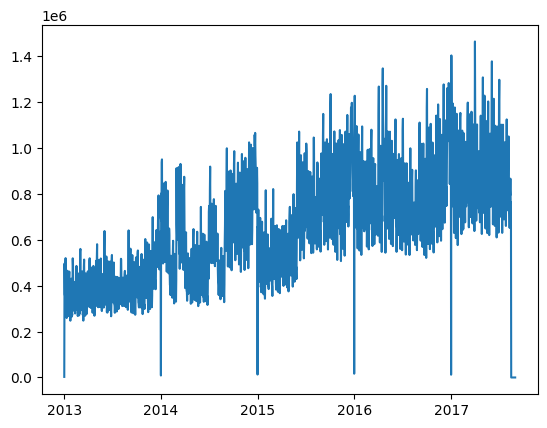

In [22]:
plt.plot(all_features.groupby('date')['sales'].sum())

In [23]:
len(all_features[all_features['sales'] == 0])

939130

In [24]:
log_sales = np.log1p(all_features['sales'])
log_sales

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
3029395    NaN
3029396    NaN
3029397    NaN
3029398    NaN
3029399    NaN
Name: sales, Length: 3029400, dtype: float64

In [25]:
max_log_sales = log_sales.max()
max_log_sales

11.73381046768262

In [26]:
min_log_sales = log_sales.min()
min_log_sales

0.0

In [27]:
all_features['sales_normalized'] = (log_sales - min_log_sales) / (max_log_sales - min_log_sales)

# Adicionando sales agrupado por loja por dia fazendo normalização com log.
store_sales = all_features.groupby(['store_nbr', 'date'])['sales'].sum().reset_index()
store_sales['sales'] = np.log1p(store_sales['sales'])
store_sales['sales_normalized'] = (store_sales['sales'] - store_sales['sales'].min()) / (store_sales['sales'].max() - store_sales['sales'].min())

all_features = all_features.merge(store_sales[['store_nbr', 'date', 'sales_normalized']], on=['store_nbr', 'date'], how='left', suffixes=('', '_store'))

all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,store_cluster,store,store_city_id,store_type_id,store_cluster_id,sales_normalized,sales_normalized_store
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0


(array([9.39130e+05, 1.00000e+00, 6.00000e+00, 1.10000e+01, 9.00000e+00,
        9.00000e+00, 2.40000e+01, 2.80000e+01, 2.40000e+01, 1.00000e+01,
        1.60000e+01, 1.15306e+05, 2.20000e+01, 2.90000e+01, 1.70000e+01,
        4.90000e+01, 4.40000e+01, 2.30000e+01, 8.59960e+04, 4.60000e+01,
        3.80000e+01, 8.30000e+01, 5.70000e+01, 6.86370e+04, 7.50000e+01,
        1.13000e+02, 7.30000e+01, 5.79440e+04, 1.45000e+02, 1.47000e+02,
        4.99840e+04, 1.82000e+02, 1.81000e+02, 4.37780e+04, 2.34000e+02,
        3.84400e+04, 3.33000e+02, 3.39050e+04, 3.94000e+02, 3.07970e+04,
        2.76300e+04, 5.26000e+02, 2.47130e+04, 2.27490e+04, 2.04360e+04,
        7.16000e+02, 1.89810e+04, 1.75710e+04, 1.65170e+04, 1.54240e+04,
        1.44150e+04, 2.55510e+04, 1.19400e+04, 1.16000e+04, 1.99720e+04,
        1.00160e+04, 1.71370e+04, 1.57350e+04, 8.29600e+03, 1.39980e+04,
        1.31340e+04, 1.23220e+04, 1.61000e+04, 1.06100e+04, 1.43630e+04,
        1.36920e+04, 9.64700e+03, 1.53690e+04, 1.18

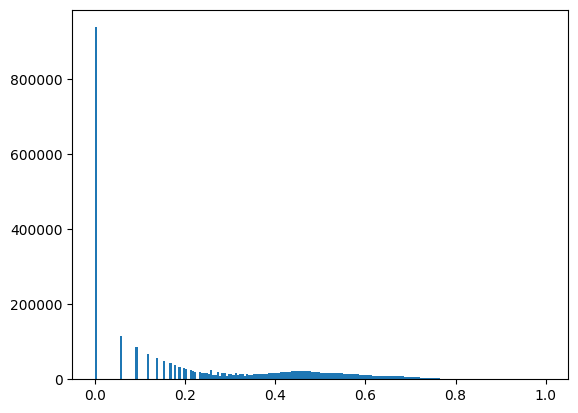

In [28]:
# Plot distribution of normalized sales
plt.hist(all_features['sales_normalized'], bins=200)

(array([2.70402e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.30000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.30000e+01, 3.30000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.30000e+01,
        0.00000e+00, 3.30000e+01, 0.00000e+00, 3.30000e+01, 3.30000e+01,
        6.60000e+01, 1.65000e+02, 6.60000e+02, 2.70600e+03, 6.83100e+03,
        1.21440e+04, 1.99980e+04, 2.93370e+04, 4.01

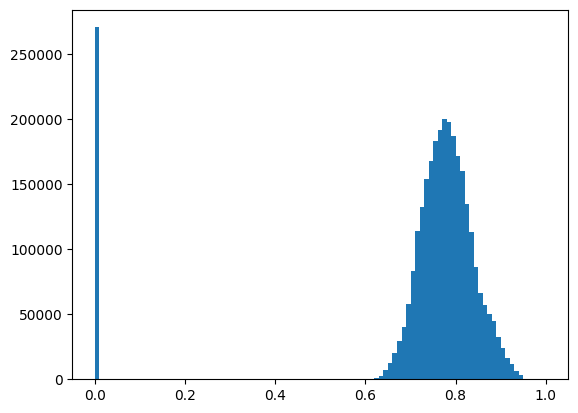

In [29]:
plt.hist(all_features['sales_normalized_store'], bins=100)

In [30]:
log_onpromotion = np.log1p(all_features['onpromotion'])
max_log_onpromotion = log_onpromotion.max()

all_features['onpromotion_normalized'] = log_onpromotion / max_log_onpromotion
all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,store_cluster,store,store_city_id,store_type_id,store_cluster_id,sales_normalized,sales_normalized_store,onpromotion_normalized
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.104874
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.000000
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.104874
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.348383


(array([2.405502e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.770930e+05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 8.048800e+04, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.651000e+04, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        3.205100e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.499900e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.257000e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.93

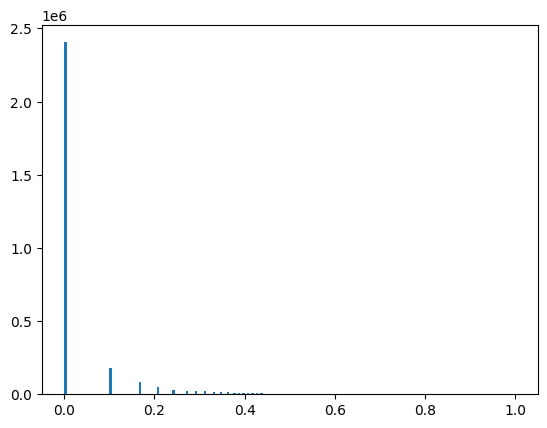

In [31]:
plt.hist(all_features['onpromotion_normalized'], bins=200)

In [32]:
item_1 = all_features.copy()

In [33]:
item_1

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,store_cluster,store,store_city_id,store_type_id,store_cluster_id,sales_normalized,sales_normalized_store,onpromotion_normalized
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,13,0,0,0,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.104874
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.000000
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.104874
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,6,53,0,1,4,NaN,0.0,0.348383


In [34]:
train_features = item_1[item_1.is_test == 0]
test_features = item_1[item_1.is_test == 1]

assert len(test_features) == len(test_dataset)

len(train_features), len(test_features)

(3000888, 28512)

In [35]:
train_features['year'] = train_features['date'].dt.year
train_features['month'] = train_features['date'].dt.month
train_features['day'] = train_features['date'].dt.day
train_features['dayofweek'] = train_features['date'].dt.dayofweek


train_features_split, val_features_split = train_test_split(train_features, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'onpromotion']
model.fit(train_features_split[features], train_features_split['sales'])
predictions = model.predict(val_features_split[features])
rmsle = np.sqrt(mean_squared_log_error(val_features_split['sales'], predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3208007188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['year'] = train_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3208007188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['month'] = train_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3208007188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

RMSLE: 3.358907698629213


In [82]:
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id', 'store_type_id', 'store_cluster_id', 'onpromotion']
X = train_features[features].values
y = train_features['sales'].values

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshaping data to 3D for Conv1D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Building the model
model = Sequential()
model.add(Conv1D(filters=5, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_logarithmic_error')

# Training the model
model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

# Making predictions
predictions = model.predict(X_val)
predictions = predictions.flatten()

# Clipping negative predictions to zero
predictions[predictions < 0] = 0

# Calculating RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69471/69471 ━━━━━━━━━━━━━━━━━━━━ 231s 3ms/step - loss: 16.4946 - val_loss: 19.3991
17368/17368 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
RMSLE: 4.404435052445898


In [38]:
train_features['year'] = train_features['date'].dt.year
train_features['month'] = train_features['date'].dt.month
train_features['day'] = train_features['date'].dt.day
train_features['dayofweek'] = train_features['date'].dt.dayofweek


train_features_split, val_features_split = train_test_split(train_features, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion']
model.fit(train_features_split[features], train_features_split['sales'])
predictions = model.predict(val_features_split[features])
predictions = np.where(predictions < 0, 0, predictions)
rmsle = np.sqrt(mean_squared_log_error(val_features_split['sales'], predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\52385811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['year'] = train_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\52385811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['month'] = train_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\52385811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

RMSLE: 3.330862978486421


# Tratando dos feriados

In [39]:
holidays = pd.DataFrame(holidays_dataset, columns=['locale_name', 'locale', 'date', 'transferred', 'description'])
holidays['date'] = pd.to_datetime(holidays['date'])

# Group by date and sum the dummies, then reset index
holidays = holidays.groupby('date').apply(lambda x: pd.Series({'locale_name': ','.join(x['locale_name']), 'locale': ','.join(x['locale']), 'description': ','.join(x['description']), 'transferred': sum(x['transferred']) / len(x)})).reset_index()

unique_holiday_locales_names = holidays['locale_name'].unique()
unique_holiday_locales = holidays['locale'].unique()
unique_holiday = holidays['description'].unique()

# Append a None locale for days that are not holidays. Put it at the start of the list.
unique_holiday_locales_names = np.insert(unique_holiday_locales_names, 0, 'None')
unique_holiday_locales = np.insert(unique_holiday_locales, 0, 'None')
unique_holiday = np.insert(unique_holiday, 0, 'None')

holidaylocalenametoidx = {locale: idx for idx, locale in enumerate(unique_holiday_locales_names)}
holidaylocaletoidx = {locale: idx for idx, locale in enumerate(unique_holiday_locales)}
holidaytoidx = {holiday: idx for idx, holiday in enumerate(unique_holiday)}

holidays['holiday_locale_name_id'] = [holidaylocalenametoidx[n] for n in holidays['locale_name']]
holidays['holiday_locale_id'] = [holidaylocaletoidx[n] for n in holidays['locale']]
holidays['holiday_id'] = [holidaytoidx[n] for n in holidays['description']]
holidays['holiday_is_transferred'] = holidays['transferred'].astype(int)

holidays = holidays.drop(['transferred', 'description', 'locale'], axis=1)

assert holidays.duplicated('date').sum() == 0

holidays

,date,locale_name,holiday_locale_name_id,holiday_locale_id,holiday_id,holiday_is_transferred
0,2012-03-02,Manta,1,1,1,0
1,2012-04-01,Cotopaxi,2,2,2,0
2,2012-04-12,Cuenca,3,1,3,0
3,2012-04-14,Libertad,4,1,4,0
4,2012-04-21,Riobamba,5,1,5,0
...,...,...,...,...,...,...
307,2017-12-22,"Salinas,Ecuador",21,6,30,0
308,2017-12-23,Ecuador,12,5,31,0
309,2017-12-24,Ecuador,12,5,50,0
310,2017-12-25,Ecuador,12,5,33,0


In [40]:
# Merge holidays
all_features = pd.merge(all_features, holidays, on='date', how='left')

all_features['holiday_locale_name_id'] = all_features['holiday_locale_name_id'].fillna(0)
all_features['holiday_locale_id'] = all_features['holiday_locale_id'].fillna(0)
all_features['holiday_id'] = all_features['holiday_id'].fillna(0)
all_features['holiday_is_transferred'] = all_features['holiday_is_transferred'].fillna(0)

# Is the current day a holiday in the current location?
all_features['holiday_relevant'] = ((all_features['locale_name'] == all_features['store_city']) | (all_features['locale_name'] == all_features['store_state']) | (all_features['locale_name'] == 'National')).astype(int)

# Drop locale_name
all_features = all_features.drop('locale_name', axis=1)

all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,...,store_type_id,store_cluster_id,sales_normalized,sales_normalized_store,onpromotion_normalized,holiday_locale_name_id,holiday_locale_id,holiday_id,holiday_is_transferred,holiday_relevant
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,...,0,0,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,...,0,0,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,...,0,0,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,...,0,0,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,...,0,0,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,...,1,4,NaN,0.0,0.104874,0.0,0.0,0.0,0.0,0
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,...,1,4,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,...,1,4,NaN,0.0,0.104874,0.0,0.0,0.0,0.0,0
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,...,1,4,NaN,0.0,0.348383,0.0,0.0,0.0,0.0,0


In [41]:
item_2 = all_features.copy()

In [42]:
train_features = item_2[item_2.is_test == 0]
test_features = item_2[item_2.is_test == 1]

assert len(test_features) == len(test_dataset)

len(train_features), len(test_features)

(3000888, 28512)

In [43]:
train_features['year'] = train_features['date'].dt.year
train_features['month'] = train_features['date'].dt.month
train_features['day'] = train_features['date'].dt.day
train_features['dayofweek'] = train_features['date'].dt.dayofweek


train_features_split, val_features_split = train_test_split(train_features, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant']
model.fit(train_features_split[features], train_features_split['sales'])
predictions = model.predict(val_features_split[features])
predictions = np.where(predictions < 0, 0, predictions)
rmsle = np.sqrt(mean_squared_log_error(val_features_split['sales'], predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\873681051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['year'] = train_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\873681051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['month'] = train_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\873681051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

RMSLE: 3.33291869139199


In [84]:
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant']
X = train_features[features].values
y = train_features['sales'].values

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshaping data to 3D for Conv1D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Building the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=10, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_logarithmic_error')

# Training the model
model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

# Making predictions
predictions = model.predict(X_val)
predictions = predictions.flatten()

# Clipping negative predictions to zero
predictions[predictions < 0] = 0

# Calculating RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69471/69471 ━━━━━━━━━━━━━━━━━━━━ 193s 3ms/step - loss: 5.6334 - val_loss: 3.0757
17368/17368 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
RMSLE: 1.7537777732863142


# Petróleo

In [44]:
# Normalize oil to be between 0 and 1
normalized_oil = oil_dataset.copy()
normalized_oil['date'] = pd.to_datetime(normalized_oil['date'])

max_oil_price = normalized_oil['dcoilwtico'].max()
min_oil_price = normalized_oil['dcoilwtico'].min()
normalized_oil['dcoilwtico_normalized'] = (normalized_oil['dcoilwtico'] - min_oil_price) / (max_oil_price - min_oil_price)
normalized_oil = normalized_oil.dropna()

assert normalized_oil.duplicated('date').sum() == 0

normalized_oil

,date,dcoilwtico,dcoilwtico_normalized
1,2013-01-02,93.14,0.792965
2,2013-01-03,92.97,0.790951
3,2013-01-04,93.12,0.792728
4,2013-01-07,93.20,0.793675
5,2013-01-08,93.21,0.793794
...,...,...,...
1213,2017-08-25,47.65,0.254175
1214,2017-08-28,46.40,0.239370
1215,2017-08-29,46.46,0.240081
1216,2017-08-30,45.96,0.234158


In [45]:
# Merge oil data based on date in both datasets
all_features = pd.merge(all_features, normalized_oil, on='date', how='left')

# Oil data is missing for weekends, so fill it in
all_features['dcoilwtico'] = all_features['dcoilwtico'].ffill()
all_features['dcoilwtico_normalized'] = all_features['dcoilwtico_normalized'].ffill()
all_features['dcoilwtico'] = all_features['dcoilwtico'].bfill()
all_features['dcoilwtico_normalized'] = all_features['dcoilwtico_normalized'].bfill()

assert len(all_features[all_features['dcoilwtico'].isna()]) == 0
assert len(all_features[all_features['dcoilwtico_normalized'].isna()]) == 0

all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,...,sales_normalized,sales_normalized_store,onpromotion_normalized,holiday_locale_name_id,holiday_locale_id,holiday_id,holiday_is_transferred,holiday_relevant,dcoilwtico,dcoilwtico_normalized
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,...,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0,93.14,0.792965
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,...,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0,93.14,0.792965
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,...,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0,93.14,0.792965
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,...,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0,93.14,0.792965
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,...,0.0,0.0,0.000000,12.0,5.0,36.0,0.0,0,93.14,0.792965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,...,NaN,0.0,0.104874,0.0,0.0,0.0,0.0,0,47.26,0.249556
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,...,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0,47.26,0.249556
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,...,NaN,0.0,0.104874,0.0,0.0,0.0,0.0,0,47.26,0.249556
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,...,NaN,0.0,0.348383,0.0,0.0,0.0,0.0,0,47.26,0.249556


(array([ 1782.,  1782.,     0.,  1782.,  1782.,  1782.,  1782., 17820.,
         8910.,  3564.,  7128.,  7128., 14256.,  7128.,  3564.,  1782.,
         8910.,  5346.,  1782., 10692.,  7128.,  5346.,  7128., 12474.,
         5346., 19602.,  7128., 17820., 12474.,  7128.,  3564., 12474.,
        17820., 16038., 24948.,  8910., 17820., 14256., 17820., 23166.,
        32076., 23166., 35640., 69498., 33858., 60588., 90882., 46332.,
        55242., 39204., 53460., 71280., 55242., 60588., 67716., 64152.,
        33858., 44550., 28512., 23166., 30294., 46332., 40986., 35640.,
        33858., 44550.,  3564.,  7128.,  1782., 10692.,  8910.,  7128.,
        19602.,  5346.,  8910.,  3564.,  3564., 23166., 17820., 24948.,
        19602.,  7128.,  5346.,  3564.,     0.,     0.,     0.,  1782.,
         1782.,     0.,     0.,     0.,     0.,     0., 10692.,     0.,
         3564.,  1782.,     0.,     0.,     0.,  1782.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

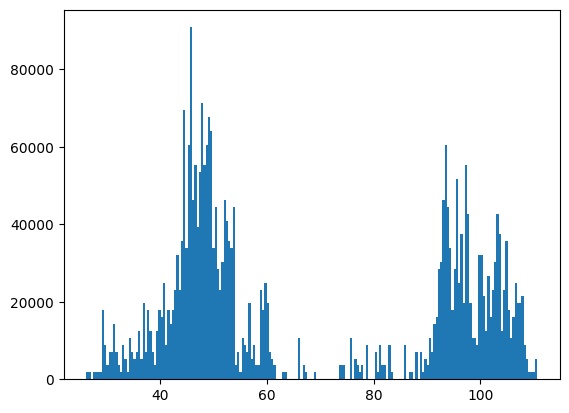

In [46]:
# Plot histogram of oil prices
plt.hist(all_features['dcoilwtico'], bins=200)

(array([ 1782.,  1782.,     0.,  1782.,  1782.,  1782.,  1782., 17820.,
         8910.,  3564.,  7128.,  7128., 14256.,  7128.,  3564.,  1782.,
         8910.,  5346.,  1782., 10692.,  7128.,  5346.,  7128., 12474.,
         5346., 19602.,  7128., 17820., 12474.,  7128.,  3564., 12474.,
        17820., 16038., 24948.,  8910., 17820., 14256., 17820., 23166.,
        32076., 23166., 35640., 69498., 33858., 60588., 90882., 46332.,
        55242., 39204., 53460., 71280., 55242., 60588., 67716., 64152.,
        33858., 44550., 28512., 23166., 30294., 46332., 40986., 35640.,
        33858., 44550.,  3564.,  7128.,  1782., 10692.,  8910.,  7128.,
        19602.,  5346.,  8910.,  3564.,  3564., 23166., 17820., 24948.,
        19602.,  7128.,  5346.,  3564.,     0.,     0.,     0.,  1782.,
         1782.,     0.,     0.,     0.,     0.,     0., 10692.,     0.,
         3564.,  1782.,     0.,     0.,     0.,  1782.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

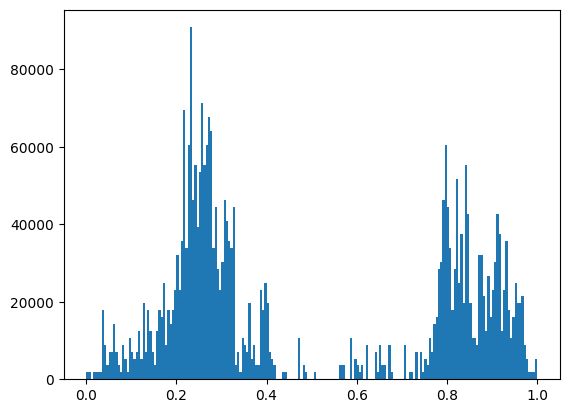

In [47]:
plt.hist(all_features['dcoilwtico_normalized'], bins=200)

In [48]:
item_3 = all_features.copy()

In [49]:
train_features = item_3[item_3.is_test == 0]
test_features = item_3[item_3.is_test == 1]

assert len(test_features) == len(test_dataset)

len(train_features), len(test_features)

(3000888, 28512)

In [50]:
train_features['year'] = train_features['date'].dt.year
train_features['month'] = train_features['date'].dt.month
train_features['day'] = train_features['date'].dt.day
train_features['dayofweek'] = train_features['date'].dt.dayofweek


train_features_split, val_features_split = train_test_split(train_features, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant', 'dcoilwtico']
model.fit(train_features_split[features], train_features_split['sales'])
predictions = model.predict(val_features_split[features])
predictions = np.where(predictions < 0, 0, predictions)
rmsle = np.sqrt(mean_squared_log_error(val_features_split['sales'], predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3565298168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['year'] = train_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3565298168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['month'] = train_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\3565298168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

RMSLE: 3.287512722539397


In [85]:
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant', 'dcoilwtico']
X = train_features[features].values
y = train_features['sales'].values

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshaping data to 3D for Conv1D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Building the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_logarithmic_error')

# Training the model
model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

# Making predictions
predictions = model.predict(X_val)
predictions = predictions.flatten()

# Clipping negative predictions to zero
predictions[predictions < 0] = 0

# Calculating RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69471/69471 ━━━━━━━━━━━━━━━━━━━━ 176s 3ms/step - loss: 5.5277 - val_loss: 2.7403
17368/17368 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
RMSLE: 1.655392788258034


# Pensando nos salários

In [51]:
# Add month
all_features['month'] = all_features['date'].dt.month
all_features['month_idx'] = all_features['month'] - all_features['month'].min()

# Add weekday
all_features['weekday'] = all_features['date'].dt.weekday

# Add year
all_features['year'] = all_features['date'].dt.year
all_features['year_idx'] = all_features['year'] - all_features['year'].min()
unique_years = all_features['year'].unique()

# Add is_wage_day as a one-hot encoded feature (15th and last day of the month)
all_features['is_wage_day'] = (all_features['date'].dt.day == 15) | (all_features['date'].dt.is_month_end)

# Add day of the month
all_features['day'] = all_features['date'].dt.day
all_features['day_idx'] = all_features['day'] - all_features['day'].min()

all_features

,id,date,store_nbr,family,sales,onpromotion,is_test,store_city,store_state,store_type,...,dcoilwtico,dcoilwtico_normalized,month,month_idx,weekday,year,year_idx,is_wage_day,day,day_idx
0,0,2013-01-01,1,0,0.0,0,0,Quito,Pichincha,D,...,93.14,0.792965,1,0,1,2013,0,False,1,0
1,1,2013-01-01,1,1,0.0,0,0,Quito,Pichincha,D,...,93.14,0.792965,1,0,1,2013,0,False,1,0
2,2,2013-01-01,1,2,0.0,0,0,Quito,Pichincha,D,...,93.14,0.792965,1,0,1,2013,0,False,1,0
3,3,2013-01-01,1,3,0.0,0,0,Quito,Pichincha,D,...,93.14,0.792965,1,0,1,2013,0,False,1,0
4,4,2013-01-01,1,4,0.0,0,0,Quito,Pichincha,D,...,93.14,0.792965,1,0,1,2013,0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,28,NaN,1,1,Quito,Pichincha,B,...,47.26,0.249556,8,7,3,2017,4,True,31,30
3029396,3029396,2017-08-31,9,29,NaN,0,1,Quito,Pichincha,B,...,47.26,0.249556,8,7,3,2017,4,True,31,30
3029397,3029397,2017-08-31,9,30,NaN,1,1,Quito,Pichincha,B,...,47.26,0.249556,8,7,3,2017,4,True,31,30
3029398,3029398,2017-08-31,9,31,NaN,9,1,Quito,Pichincha,B,...,47.26,0.249556,8,7,3,2017,4,True,31,30


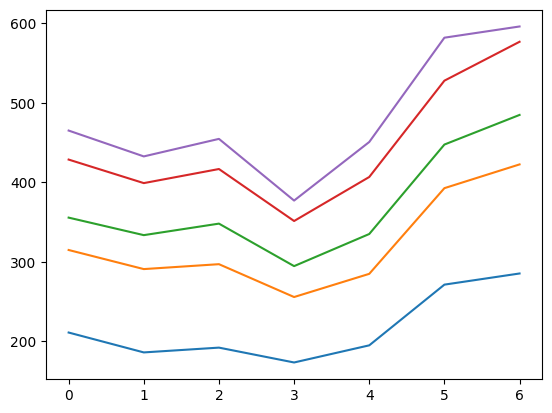

In [52]:
# Plot averages sales per weekday, with each year as a separate line
weekday_averages = all_features.groupby(['year', 'weekday'])['sales'].mean().reset_index()

for year in weekday_averages['year'].unique():
    plt.plot(weekday_averages[weekday_averages['year'] == year]['weekday'], weekday_averages[weekday_averages['year'] == year]['sales'], label=year)

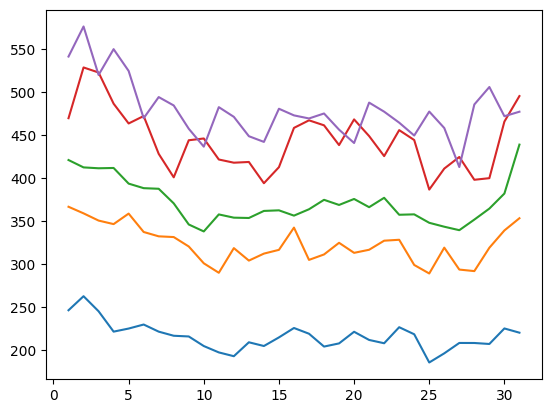

In [53]:
# Plot sales by day and mark wage days
day_averages = all_features.groupby(['year', 'day'])['sales'].mean().reset_index()

for year in day_averages['year'].unique():
    plt.plot(day_averages[day_averages['year'] == year]['day'], day_averages[day_averages['year'] == year]['sales'], label=year)

In [54]:
opening_days = all_features[all_features['sales'] > 0].groupby('store')['date'].min()

# Drop rows before the opening day
print(f'Before dropping: {len(all_features)}')

all_features = all_features[all_features['date'] >= all_features['store'].map(opening_days)].reset_index(drop=True)

print(f'After dropping: {len(all_features)}')

Before dropping: 3029400
After dropping: 2807343


(array([7.17073e+05, 1.00000e+00, 6.00000e+00, 1.10000e+01, 9.00000e+00,
        9.00000e+00, 2.40000e+01, 2.80000e+01, 2.40000e+01, 1.00000e+01,
        1.60000e+01, 1.15306e+05, 2.20000e+01, 2.90000e+01, 1.70000e+01,
        4.90000e+01, 4.40000e+01, 2.30000e+01, 8.59960e+04, 4.60000e+01,
        3.80000e+01, 8.30000e+01, 5.70000e+01, 6.86370e+04, 7.50000e+01,
        1.13000e+02, 7.30000e+01, 5.79440e+04, 1.45000e+02, 1.47000e+02,
        4.99840e+04, 1.82000e+02, 1.81000e+02, 4.37780e+04, 2.34000e+02,
        3.84400e+04, 3.33000e+02, 3.39050e+04, 3.94000e+02, 3.07970e+04,
        2.76300e+04, 5.26000e+02, 2.47130e+04, 2.27490e+04, 2.04360e+04,
        7.16000e+02, 1.89810e+04, 1.75710e+04, 1.65170e+04, 1.54240e+04,
        1.44150e+04, 2.55510e+04, 1.19400e+04, 1.16000e+04, 1.99720e+04,
        1.00160e+04, 1.71370e+04, 1.57350e+04, 8.29600e+03, 1.39980e+04,
        1.31340e+04, 1.23220e+04, 1.61000e+04, 1.06100e+04, 1.43630e+04,
        1.36920e+04, 9.64700e+03, 1.53690e+04, 1.18

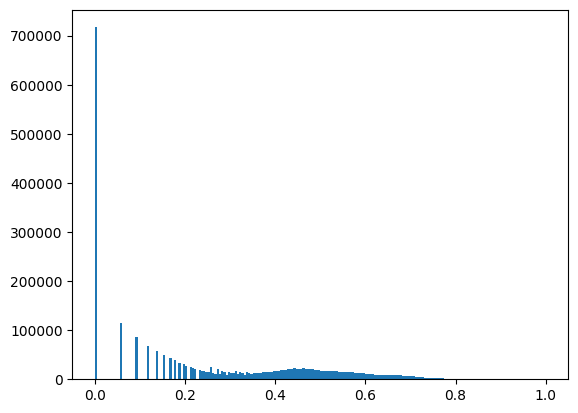

In [55]:
plt.hist(all_features['sales_normalized'], bins=200)

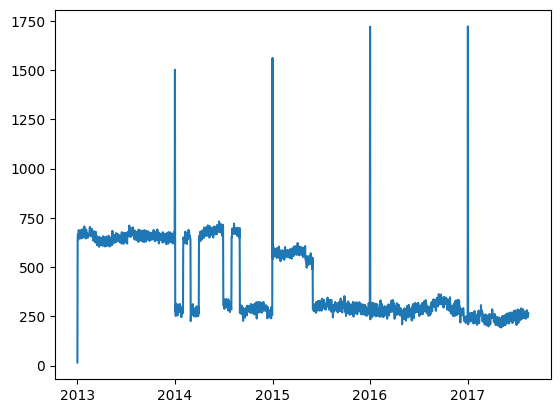

In [56]:
# Plot dates with 0 sales
plt.plot(all_features[all_features['sales'] == 0].groupby('date')['sales'].count())

In [57]:
all_features[all_features['sales'] == 0].groupby('date')['sales'].count().reset_index().sort_values('sales', ascending=False)

,date,sales
1457,2017-01-01,1721
1092,2016-01-01,1720
728,2015-01-01,1561
364,2014-01-01,1501
529,2014-06-15,732
...,...,...
1576,2017-04-30,199
1534,2017-03-19,199
1577,2017-05-01,195
1582,2017-05-06,194


In [58]:
assert all_features.isna().any(axis=1).sum() == len(test_dataset)
assert all_features['sales_normalized'].max() == 1
assert all_features['sales_normalized'].min() == 0
assert all_features['onpromotion_normalized'].max() == 1
assert all_features['onpromotion_normalized'].min() == 0
assert all_features['dcoilwtico_normalized'].max() == 1
assert all_features['dcoilwtico_normalized'].min() == 0

In [59]:
train_features = all_features[all_features.is_test == 0]
test_features = all_features[all_features.is_test == 1]

assert len(test_features) == len(test_dataset)

len(train_features), len(test_features)

(2778831, 28512)

In [60]:
train_features['year'] = train_features['date'].dt.year
train_features['month'] = train_features['date'].dt.month
train_features['day'] = train_features['date'].dt.day
train_features['dayofweek'] = train_features['date'].dt.dayofweek


train_features_split, val_features_split = train_test_split(train_features, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant', 'dcoilwtico', 'is_wage_day']
model.fit(train_features_split[features], train_features_split['sales'])
predictions = model.predict(val_features_split[features])
predictions = np.where(predictions < 0, 0, predictions)
rmsle = np.sqrt(mean_squared_log_error(val_features_split['sales'], predictions))
print(f'RMSLE: {rmsle}')

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\2804793928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['year'] = train_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\2804793928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features['month'] = train_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\2804793928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

RMSLE: 3.215503826829949


In [88]:
features = ['store', 'year', 'month', 'day', 'dayofweek', 'store_city_id',	'store_type_id', 'store_cluster_id', 'family', 'onpromotion', 'holiday_id', 'holiday_is_transferred', 'holiday_locale_name_id', 'holiday_locale_id', 'holiday_relevant', 'dcoilwtico', 'is_wage_day']
X = train_features[features].values
y = train_features['sales'].values

# Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshaping data to 3D for Conv1D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Building the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=14, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_logarithmic_error')

# Training the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Making predictions
predictions = model.predict(X_val)
predictions = predictions.flatten()

# Clipping negative predictions to zero
predictions[predictions < 0] = 0

# Calculating RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, predictions))
print(f'RMSLE: {rmsle}')

Epoch 1/50


C:\Users\wpett\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69471/69471 ━━━━━━━━━━━━━━━━━━━━ 175s 2ms/step - loss: 5.4679 - val_loss: 2.7969
Epoch 2/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 169s 2ms/step - loss: 4.3868 - val_loss: 2.7523
Epoch 3/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 163s 2ms/step - loss: 4.2567 - val_loss: 2.4657
Epoch 4/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 171s 2ms/step - loss: 4.1577 - val_loss: 2.4645
Epoch 5/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 164s 2ms/step - loss: 4.1076 - val_loss: 2.3167
Epoch 6/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 167s 2ms/step - loss: 4.0596 - val_loss: 2.3902
Epoch 7/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 170s 2ms/step - loss: 4.0254 - val_loss: 2.4565
Epoch 8/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 170s 2ms/step - loss: 3.9838 - val_loss: 2.3343
Epoch 9/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 173s 2ms/step - loss: 3.9508 - val_loss: 2.6432
Epoch 10/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 185s 3ms/step - loss: 3.9230 - val_loss: 2.3579
Epoch 11/50
69471/69471 ━━━━━━━━━━━━━━━━━━━━ 182s 3ms/step - loss: 3.9085 - val_loss: 2.84

In [89]:
test_features['year'] = test_features['date'].dt.year
test_features['month'] = test_features['date'].dt.month
test_features['day'] = test_features['date'].dt.day
test_features['dayofweek'] = test_features['date'].dt.dayofweek

X_test=test_features[features].values

# Normalizando os dados de teste com o mesmo scaler usado no treinamento
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Fazendo as previsões
test_predictions = model.predict(X_test)
test_predictions = test_predictions.flatten()

test_predictions[test_predictions < 0] = 0

# Criando o dataframe para submissão
submission = pd.DataFrame({
    'id': test_features['id'],
    'sales': test_predictions
})

# Salvando o dataframe como submission.csv
submission.to_csv('submission.csv', index=False)

 36/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\988517697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['year'] = test_features['date'].dt.year
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\988517697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['month'] = test_features['date'].dt.month
C:\Users\wpett\AppData\Local\Temp\ipykernel_25852\988517697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Split the data
train_features_split = train_features[:train_split_index]
val_features_split = train_features[train_split_index:]

# Reset index for validation set
val_features_split.reset_index(inplace=True, drop=True)

In [ ]:
len(train_features_split), len(val_features_split)

In [ ]:
train_features_split.date.max(), val_features_split.date.min(), val_features_split.date.max()

In [ ]:
feature_columns = [
    'store', 'store_city_id', 'store_type_id', 'store_cluster_id', 'family', 'holiday_locale_name_id', 'holiday_id', 'holiday_locale_id', 'weekday', 'year_idx', 'month_idx',
    'onpromotion_normalized', 'dcoilwtico', 'holiday_is_transferred', 'holiday_relevant',
]

past_feature_columns = [
    'store', 'store_city_id', 'store_type_id', 'store_cluster_id', 'family', 'holiday_locale_name_id', 'holiday_id', 'holiday_locale_id', 'weekday', 'year_idx', 'month_idx',
    'onpromotion_normalized', 'dcoilwtico', 'holiday_is_transferred', 'holiday_relevant',
    'sales_normalized',
]

all_columns = list(set([
    'id',
    *feature_columns,
    *past_feature_columns,
    # Labels
    'sales_normalized',
]))

all_columns